#Importing Libraries

---

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import glob
from itertools import groupby
import matplotlib.pyplot as plt
from fastai import *
from fastai.vision import *
from google.colab import drive
import pandas as pd
import numpy as np
import collections

# **Importing Our Dataset**

---


In [3]:
# Mounting Google Drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Path to paintings directory 
paintings_path = "/content/drive/My Drive/Colab Notebooks/dataset"

# Extracting artist names
artists_file_path = glob.glob(paintings_path + '/*.jpg')

In [0]:
# Storing list of artist names
list_of_artists = []


for filename in artists_file_path:
    artist_name = ""
    artist_path = (filename.split("/")[6].split("_"))[0:-1]
    for item in artist_path:
        artist_name = artist_name + " " + item
    list_of_artists.append(artist_name)

In [0]:
# Storing frequency of paintings per artist
artist_frequency = {value: len(list(freq)) for value, freq in groupby(sorted(list_of_artists))}
sorted_artist_frequency = OrderedDict(sorted(artist_frequency.items(), key=lambda t: t[1]))

# Analyzing Our Dataset

In [9]:
print("Number of Artists: " + str(len(artist_frequency)))
print("Maxmimum Number of Paintigs Per Artist: " + str(max(artist_frequency.values())))
print("Minimum Number of Paintigs Per Artitst: " + str(min(artist_frequency.values())))

Number of Artists: 5
Maxmimum Number of Paintigs Per Artist: 300
Minimum Number of Paintigs Per Artitst: 300


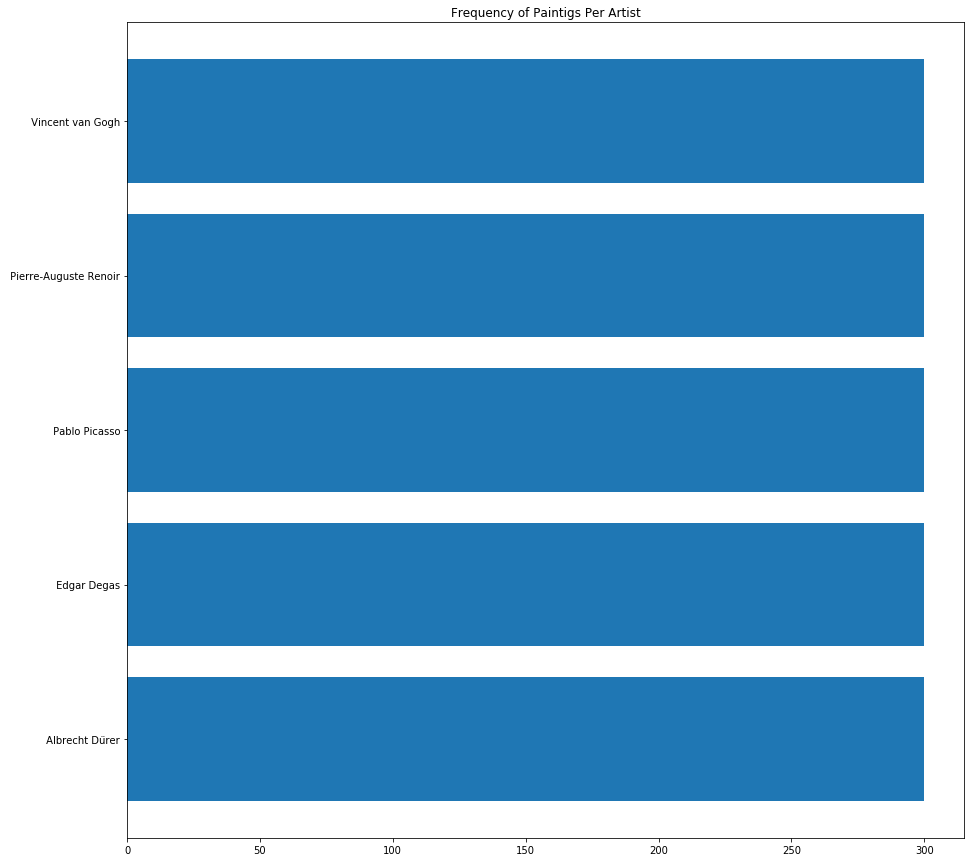

In [10]:
# Horizontal Bar Graph of Frequency of Paintigs Per Artist
artists = list(sorted_artist_frequency.keys())
frequency = list(sorted_artist_frequency.values())

x_pos = range(len(sorted_artist_frequency))

plt.figure(figsize=(15,15))
plt.barh(x_pos, frequency)
plt.title("Frequency of Paintigs Per Artist")

plt.yticks(x_pos, artists)

plt.show()

# Training The Model

In [11]:
# do_Flip = True --> images are being trained flipped and in several rotations

tfms = get_transforms()

artist_names = get_image_files(paintings_path)

data = ImageDataBunch.from_name_re(
    paintings_path,
    artist_names,
    r'/([^/]+)_\d+.jpg$',
    ds_tfms=get_transforms(),
    size=224,
    num_workers=0
)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Vincent_van_Gogh,Vincent_van_Gogh,Vincent_van_Gogh,Vincent_van_Gogh,Vincent_van_Gogh
Path: /content/drive/My Drive/Colab Notebooks/dataset;

Valid: LabelList (300 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Albrecht_Dürer,Pablo_Picasso,Pierre-Auguste_Renoir,Albrecht_Dürer,Pablo_Picasso
Path: /content/drive/My Drive/Colab Notebooks/dataset;

Test: None

In [0]:
defaults.device = torch.device('cuda')

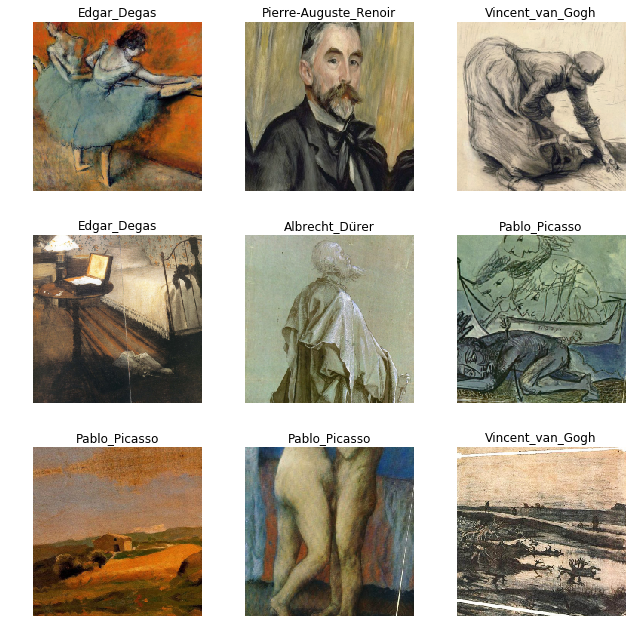

In [0]:
# Previewing a sample batch
data.show_batch(rows=3, figsize=(9,9))

In [0]:
# Printing Classes
data.classes

['Albrecht_Dürer',
 'Edgar_Degas',
 'Pablo_Picasso',
 'Pierre-Auguste_Renoir',
 'Vincent_van_Gogh']

### RESNET 152

In [14]:
# Using resnet152 --> transfer learning
# Metrics --> error_rate,accuracy,mean_squared_error,top_k_accuracy,r2_score
artist_identification = cnn_learner(data, models.resnet152, metrics=(error_rate,accuracy), 
                                    model_dir='/content/drive/My Drive/Colab Notebooks/models')

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:12<00:00, 20010757.35it/s]


In [0]:
artist_identification.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.038071,0.451791,0.146667,0.853333,07:09
1,0.656984,0.453840,0.153333,0.846667,01:19
2,0.477521,0.424867,0.136667,0.863333,01:08


In [0]:
artist_identification.save('version_152n_1.0')

In [0]:
#Initiating refit and checking LR
artist_identification.load('version_1.0')
artist_identification.unfreeze()
artist_identification.lr_find() 

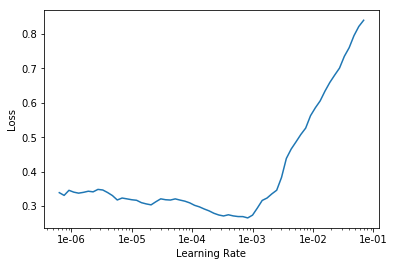

In [0]:
artist_identification.recorder.plot()

In [0]:
#The lowest loss is at 1e-06 and loss increases from after 1e-04. Refitting by modulating LR
artist_identification.fit_one_cycle(2,max_lr=slice(1e-05,1e-04))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.324668,0.196321,0.070000,0.930000,01:15
1,0.250189,0.201763,0.083333,0.916667,01:17


In [0]:
artist_identification.save('version_152n_2.0')

In [0]:
artist_identification.unfreeze()
artist_identification.lr_find()

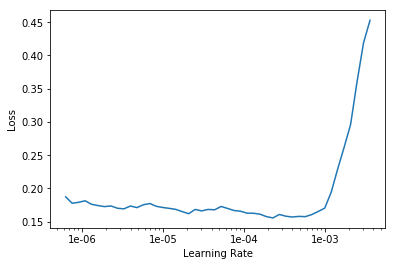

In [0]:
artist_identification.recorder.plot()

In [0]:
#The lowest loss is at 1e-06 and loss increases from after 1e-04. Refitting by modulating LR
artist_identification.fit_one_cycle(2,max_lr=slice(1e-05,1e-04))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.170187,0.177952,0.063333,0.936667,01:16
1,0.142418,0.160365,0.060000,0.940000,01:16


In [0]:
artist_identification.save('version_152n_3.0')

In [0]:
artist_identification.unfreeze()
artist_identification.lr_find()

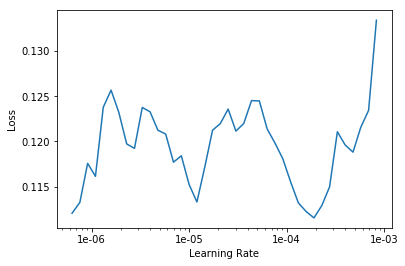

In [0]:
artist_identification.recorder.plot()

In [0]:
#The lowest loss is at 1e-06 and loss increases from after 1e-04. Refitting by modulating LR
artist_identification.fit_one_cycle(2,max_lr=slice(1e-06,1e-05))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.134767,0.159839,0.060000,0.940000,01:17
1,0.125475,0.161644,0.060000,0.940000,01:16


In [0]:
artist_identification.save('version_152n_4.0')

In [0]:
artist_identification.unfreeze()
artist_identification.lr_find()

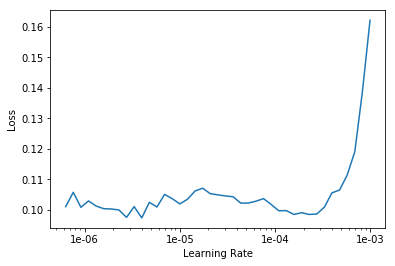

In [0]:
artist_identification.recorder.plot()

In [0]:
artist_identification.fit_one_cycle(2,max_lr=slice(1e-05,1e-04))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.104657,0.170933,0.063333,0.936667,01:17
1,0.089800,0.174583,0.066667,0.933333,01:17


In [0]:
artist_identification.save('version_152n_6.0')

In [15]:
artist_identification.load('version_152n_4.0')

Learner(data=ImageDataBunch;

Train: LabelList (1200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Vincent_van_Gogh,Vincent_van_Gogh,Vincent_van_Gogh,Vincent_van_Gogh,Vincent_van_Gogh
Path: /content/drive/My Drive/Colab Notebooks/dataset;

Valid: LabelList (300 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Albrecht_Dürer,Pablo_Picasso,Pierre-Auguste_Renoir,Albrecht_Dürer,Pablo_Picasso
Path: /content/drive/My Drive/Colab Notebooks/dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
 

In [16]:
interp = ClassificationInterpretation.from_learner(artist_identification)

KeyboardInterrupt: ignored

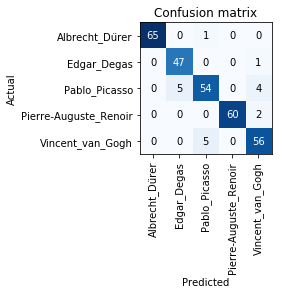

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[('Pablo_Picasso', 'Edgar_Degas', 5),
 ('Vincent_van_Gogh', 'Pablo_Picasso', 5),
 ('Pablo_Picasso', 'Vincent_van_Gogh', 4),
 ('Pierre-Auguste_Renoir', 'Vincent_van_Gogh', 2),
 ('Albrecht_Dürer', 'Pablo_Picasso', 1),
 ('Edgar_Degas', 'Vincent_van_Gogh', 1)]

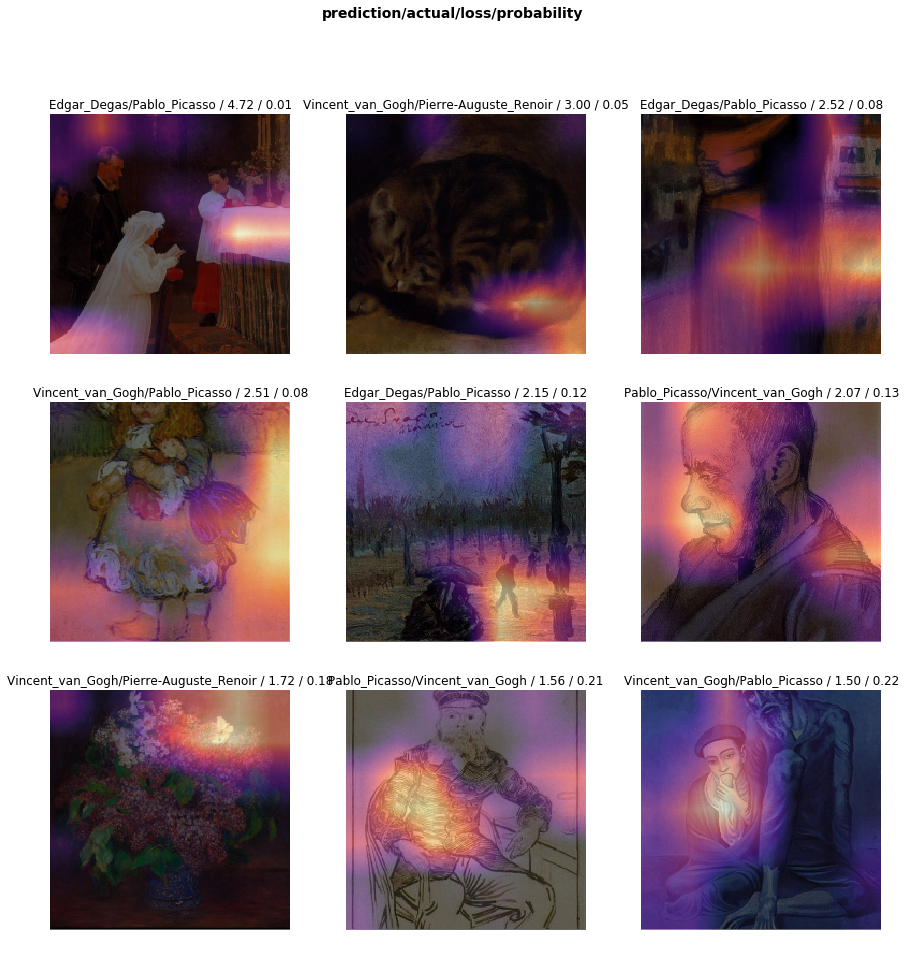

In [0]:
interp.plot_top_losses(9, figsize=(15,15))

In [0]:
images = [('Vincent Van Gogh', 'https://www.thenational.ae/image/policy:1.850830:1555593331/ac19-APR-art-tate-van-gogh07.jpg?f=16x9&w=1200&$p$f$w=e893890'),
          ('Albrecht Durer', 'https://i.ibb.co/Gphk3yG/Albrecht-D-rer-306.jpg'),
          ('Edgar Degas', 'https://i.ibb.co/7bBFSNW/Edgar-Degas-301.jpg')
         ]

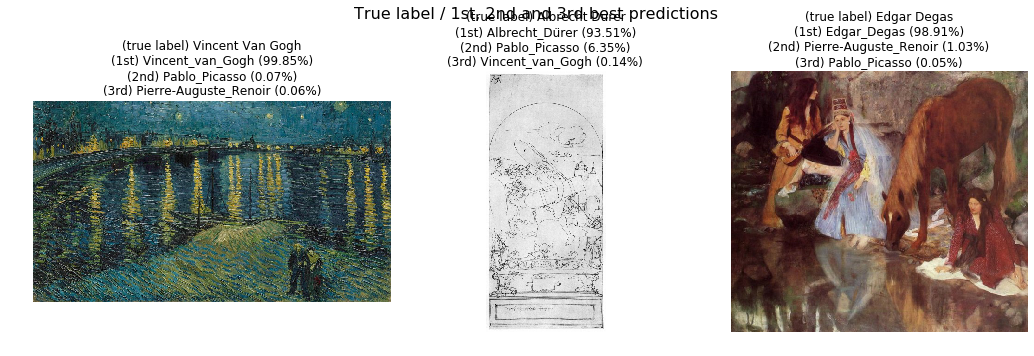

In [24]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('True label / 1st, 2nd and 3rd best predictions', fontsize=16)

for i, image in enumerate(images):
    
    # Get image
    class_name, img_url = image[0], image[1]
    response = requests.get(img_url)
    img = open_image(BytesIO(response.content))

    # Get best first prediction
    pred_1_class, indice, preds = artist_identification.predict(img)

    # Get all best predictions
    preds_sorted, idxs = preds.sort(descending=True)
    
    # Get best 3 predictions - classes
    pred_2_class = artist_identification.data.classes[idxs[1]]
    pred_3_class = artist_identification.data.classes[idxs[2]]
    
    # Get best 3 predictions - probabilities
    pred_1_prob = np.round(100*preds_sorted[0].item(),2)
    pred_2_prob = np.round(100*preds_sorted[1].item(),2)
    pred_3_prob = np.round(100*preds_sorted[2].item(),2)
    preds_best3 = [f'{pred_1_class} ({pred_1_prob}%)', f'{pred_2_class} ({pred_2_prob}%)', f'{pred_3_class} ({pred_3_prob}%)']
    
    # Display images with True label / 1st, 2nd and 3rd best Predictions
    plt.tight_layout()
    img.show(ax=ax[i],
             title=f'(true label) {class_name}\n(1st) {preds_best3[0]}\n(2nd) {preds_best3[1]}\n(3rd) {preds_best3[2]}')